In [9]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

# Pronalazak top K smerova gledanja za svakog studenta
## Pronalazak jedinstvenog vektora svih pravaca kod svih studenata i izracunavanje slicnosti pomocu binarnog sabiranja pravaca gledanja u jedinstvenom vektoru

In [13]:
studentsTopK

[['dcb', 'cb', 'cbc'],
 ['bad', 'ada', 'dab'],
 ['bab', 'bcb', 'ada'],
 ['aba', 'ada', 'dac'],
 ['aba', 'bab', 'dab'],
 ['aba', 'dcd', 'cbc'],
 ['cdc', 'dcd', 'bab'],
 ['cbc', 'bcb', 'cb'],
 ['dad', 'ada', 'aba'],
 ['cbc', 'bcb', 'bcd'],
 ['bcd', 'bab', 'cab'],
 ['aba', 'bab', 'dad'],
 ['aba', 'bab', 'bdc'],
 ['cdc', 'acd', 'bac'],
 ['cbc', 'dbc', 'bab'],
 ['abc', 'bab', 'dab'],
 ['dab', 'aba', 'bad'],
 ['dcb', 'bdc', 'cbc'],
 ['bab', 'cba', 'ba'],
 ['aba', 'bca', 'bab'],
 ['ada', 'aba', 'cad'],
 ['dac', 'acd', 'dcd'],
 ['dca', 'ad', 'dcd'],
 ['cbc', 'dac', 'adc'],
 ['bca', 'aca', 'cac'],
 ['bab', 'aba', 'cba'],
 ['aba', 'bab', 'cbc'],
 ['bcb', 'dad', 'dcd'],
 ['aba', 'ada', 'ba'],
 ['aba', 'acd', 'ada'],
 ['bab', 'dcd', 'bda'],
 ['aba', 'dab', 'bab'],
 ['aba', 'bab', 'ba'],
 ['bab', 'bcd', 'aba'],
 ['ada', 'bad', 'aba'],
 ['dad', 'bad', 'ada'],
 ['dad', 'dcd', 'ada'],
 ['dcb', 'aba', 'ada'],
 ['adc', 'dba', 'ada'],
 ['bab', 'aba', 'cba'],
 ['bcd', 'cbc', 'bc'],
 ['dba', 'bab', 'cbc'],

All unique sequences value
['ab' 'aba' 'abc' 'aca' 'acd' 'ad' 'ada' 'adc' 'ba' 'bab' 'bac' 'bad' 'bc'
 'bca' 'bcb' 'bcd' 'bda' 'bdc' 'cab' 'cac' 'cad' 'cb' 'cba' 'cbc' 'cdc'
 'dab' 'dac' 'dad' 'dba' 'dbc' 'dca' 'dcb' 'dcd']
---------------------------
All sums
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<IPython.core.display.Javascript object>


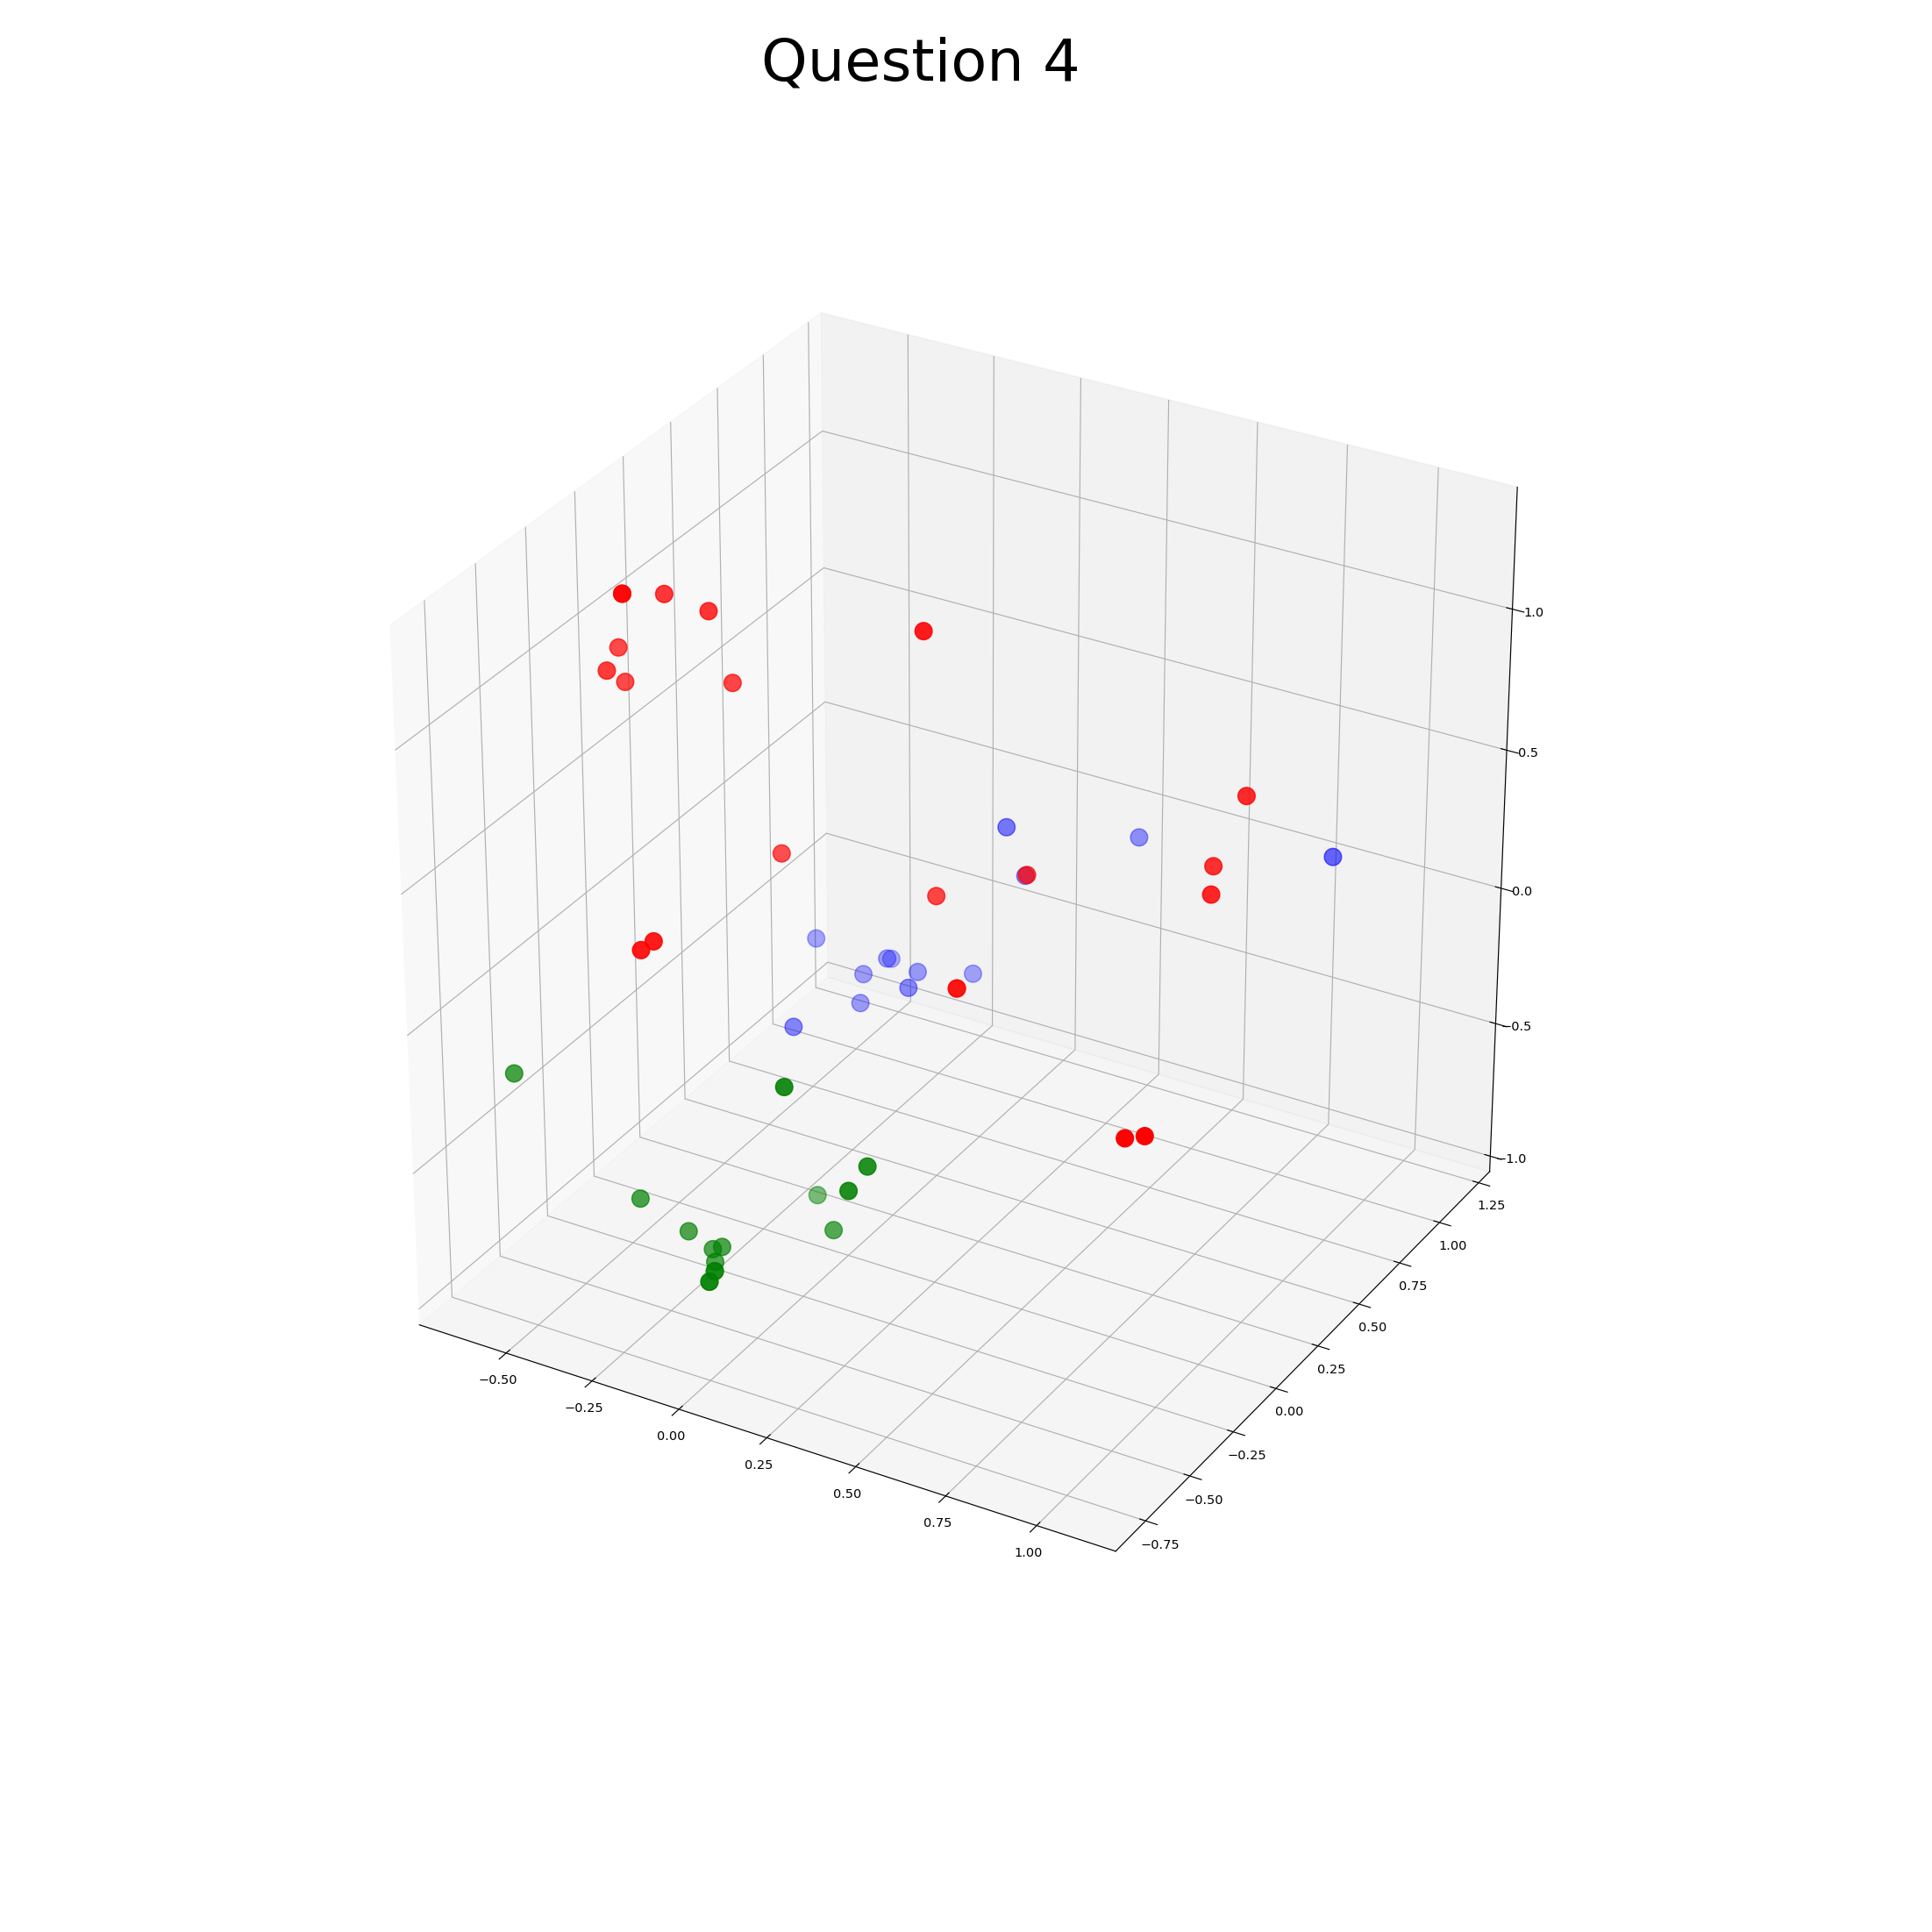

In [12]:
quest = 4
%matplotlib notebook
studentsTopK = getStudentsTopK(question=quest,k=3,alfa=4)
    
uniqueSequences = uniqueArray(studentsTopK)
print("All unique sequences value")
print(uniqueSequences)
print("---------------------------")
print("All sums")
sumByQuestion,arr = getSum(studentsTopK,uniqueSequences)
print(sorted(sumByQuestion))

# arr = niz vektora tipa [1 0 1 0] ili [0 1 1 1]
pca = PCA(n_components=3)
pca.fit(arr)
X = pca.transform(arr)
print(np.sum(pca.explained_variance_ratio_))
#print(X)

n = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print(len(sumByQuestion) > len(arr))
colors = ['r','g','b','y','purple','orange']

fig = plt.figure()
fig.set_size_inches(20, 20)
fig.suptitle('Question {}'.format(quest), fontsize=46)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,2], X[:,1], X[:,0],s=180,  c=labels, cmap=cls.ListedColormap(colors[0:n]));


# Plot po binarnim sumama

All unique sequences value
['a' 'ab' 'ac' 'ad' 'b' 'ba' 'bc' 'bd' 'c' 'cb' 'cd' 'd' 'da' 'db' 'dc']
---------------------------
All sums
[22, 35, 56, 74, 82, 146, 162, 162, 530, 552, 592, 592, 592, 832, 832, 1029, 1090, 1104, 3104, 4099, 4114, 4130, 4130, 4136, 4136, 4162, 4610, 4612, 4672, 5248, 6152, 6272, 8240, 9280, 16387, 16417, 16418, 16418, 16520, 16928, 17416, 18944, 21504]


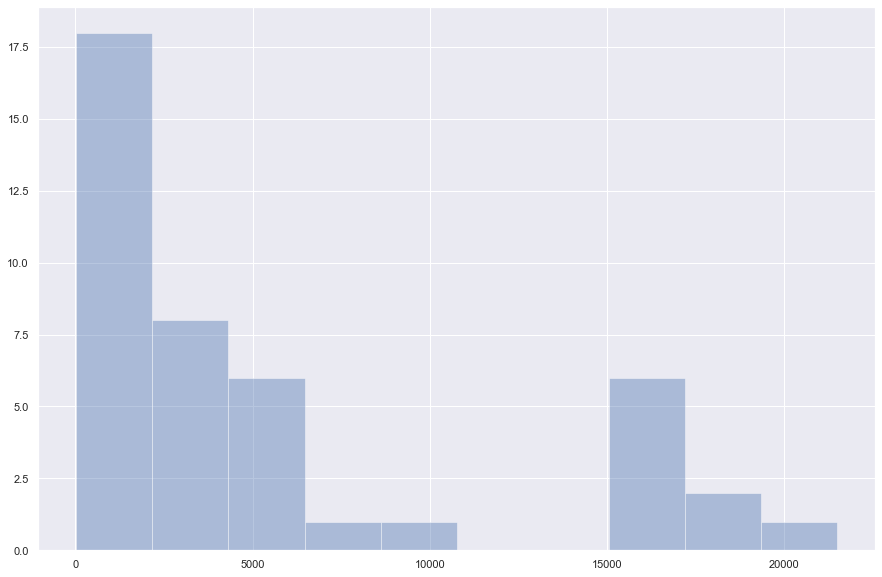

In [109]:


import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=7)
plt.figure(figsize=(15,10))
sns.set(color_codes=True)
sns.distplot(sumByQuestion,kde=False,bins = 10);

# 7  = gore,  desno i dole
# 11 = gore,  desno i levo
# 13 = gore,  dole  i levo
# 14 = desno, dole  i gore

# Funckija koja za jedno pitanje izracuna top K pravaca gledanja svih studenata

In [2]:
def getStudentsTopK(question, k, alfa):
    studentsTopK = []
    for i in range(1,50):
        student = pd.read_csv('Cleaned_DS/{}.csv'.format(i))

        filter_data = student[student['Valid'] ==1]
        filter_data = filter_data.drop('Valid', 1)

        filter_data['FpogX'] = filter_data['FpogX']*1920
        filter_data['FpogY'] = filter_data['FpogY']*1080

        diff_x = np.diff(filter_data['FpogX'])
        diff_y = np.diff(filter_data['FpogY'])
        
        filter_data.drop(filter_data.tail(1).index,inplace=True)
        filter_data.insert(4,'sd',np.sqrt(np.power(diff_x,2) + np.power(diff_y,2)))

        sa = np.arctan2(diff_x,diff_y);
        sa_deg = []
        for j in sa:
            sa_deg.append(math.degrees(j))

        filter_data.insert(5,'sa',sa_deg)

        directions = []
        for j in filter_data['sa']:
            if j < 135 and j >=45:
                directions.append('a')
            elif (j< 45 and j>=0) or (j >=-45 and j<0):
                directions.append('b')
            elif j>= -135 and j<-45:
                directions.append('c')
            elif (j<-135 and j >=-180) or (j >=135 and j<=180):
                directions.append('d')
            else :
                print(i);

        filter_data.insert(6,'Direction',directions)
        studentsTopK.append(oneStudentOneQuestionResult(filter_data, question, alfa, k))
    return studentsTopK

# Funkcija koja pronalazi jedinstven vektor svih smerova koji su se pojavili kod studenata

In [3]:
def uniqueArray(array):
    uniques = []
    for temp in array:
        for i in temp:
            uniques.append(i)
    return np.unique(uniques)


In [4]:
def getSum(arr,uniques):
    res = []
    arr2 = []
    for i in range(0,len(arr)):
        for j in uniques:
            if j in arr[i]:
                res.append(1)
            else:
                res.append(0)

        arr2.append(res)
        res = []
    print(arr2)
    sums = []
    for i in arr2:
        sum = 0;
        for j in range(0,len(i)):
            if i[j] == 1:
                sum +=(pow(2,j))
        sums.append(sum)
    array = []
    for i in range(0,len(sums)):
        if sums[i] != 0:
            array.append(arr2[i])
    return sums,array

# Funkcija koja pronalazi rezultat jednog studenta za jedno pitanje
## Koristi dole navedene funkcije

In [5]:
def oneStudentOneQuestionResult(student,question,alfa,k):
    uniques = []
    arr = []
    q1 = student[student['QuestionId'] ==question]['Direction'];
    #q1 = getMA(student[student['QuestionId'] ==question])
    
    ds = [];
    last = '/'

    for i in q1:
        if i != last:
            ds.append(i);
        last = i
    temp = top_k(ds,alfa,k)
    return temp
      
   

# Funkcija koja pronalazi macro sekvencu

In [6]:
def getMA(filter_data):
    ds = []
    flag = -1;
    directions = filter_data['Direction']
    
    i =0
    for direction in directions:
        x = filter_data.iloc[i,2]
        y = filter_data.iloc[i,3]
        sd = filter_data.iloc[i,4]

        if x > 625.0 and x < 1289.0 and y > 112.0 and y < 175.0:
            if flag != 1:
                ds.append(direction)
                flag = 1;
        elif x > 223.0 and x < 708.0 and y > 210.0 and y < 482.0:
            if flag != 2:
                ds.append(direction)
                flag = 2; 
        elif x > 223.0 and x < 708.0 and y > 498.0 and y < 585.0:
            if flag != 3:
                ds.append(direction)
                flag = 3;
        elif x > 1234.0 and x < 1719.0 and y > 210.0 and y < 482.0:
            if flag != 4:
                ds.append(direction)
                flag = 4;
        elif x > 1234.0 and x < 1719.0 and y > 498.0 and y < 585.0:
            if flag != 5:
                flag = 5;
                ds.append(direction)
        elif x > 223.0 and x < 708.0 and y > 596.7 and y < 919.0:
            if flag != 6:
                flag = 6;
                ds.append(direction)
        elif x > 223.0 and x < 708.0 and y > 925.0 and y < 1010.96:
            if flag != 7:
                flag = 7;
                ds.append(direction)
        elif x > 1234.0 and x < 1719.0 and y > 597.0 and y < 919.0:
            if flag != 8:
                flag = 8;
                ds.append(direction)
        elif x > 1234.0 and x < 1719.0 and y > 925.0 and y < 1011.0:
            if flag != 9:
                flag = 9;
                ds.append(direction)
        i+=1
    return ds


# Funkcija koja od vektora studentovog pogleda pronalazi top K najfrekventnijih smerova duzine od 1 do alfa

In [7]:
def top_k(MA, alfa,k):
    MAsub = []
    sequencelist = []
    FMA = []
    MAfreqsub = []
    cnt = 0;
    for i in range(1,alfa):
        for j in range(0,len(MA)-alfa):

            temp = ''.join(MA[j:j+i]);
            if  temp in sequencelist:
                   cnt =cnt
            else:
                MAsub.append(temp)
                sequencelist.append( MAsub[-1]);
                cnt=cnt+1;
                MAfreqsub.append(isSubArray(MA,MAsub[-1],len(MA),len(MAsub[-1]))*len(MAsub));

    for i in range(0,len(MAsub)-1):
        for j in range(i+1,len(MAsub)):
            if MAfreqsub[i] < MAfreqsub[j] :
                temp = MAfreqsub[i]
                MAfreqsub[i] = MAfreqsub[j]
                MAfreqsub[j] = temp
                temp = MAsub[i]
                MAsub[i] = MAsub[j]
                MAsub[j] = temp

    return MAsub[0:k]

# Pomocna funkcija za trazenje podniza

In [8]:
def isSubArray(A, B, n, m): 
    cnt= 0;
    # Two pointers to traverse the arrays 
    i = 0
    j = 0
  
    # Traverse both arrays simultaneously 
    while (i < n and j < m): 
          
        # If element matches increment  
        # both pointers 
        if (A[i] == B[j]): 
            i += 1
            j += 1
  
            # If array B is completely 
            # traversed 
            if (j == m): 
                cnt+=1;
                i += 1
                j = 0
      
        # If not, increment i and reset j 
        else: 
            i += 1
            j = 0
  
    return cnt